In [5]:
# These lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Importing GemPy, which takes really long
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

from gempy import GridClass

In [41]:
# set basic parameters 

ext = [0,10,0,10,0,10] #extend
res = [10,10,10] #resolution
n = 20 #number of training values
val_rng = [0,20] #range of training values

In [42]:
# create empty Grid with defined extension and resolution as a gempy GridClass. 
# note that this grid is an np.ndarray containing x,y,z vectors (size x*3)

g = GridClass
g.create_regular_grid_3d(g,ext,res);

In [43]:
# creating array of input values to be shown at given coordinates, basis for (Co)Kriging

# c = np.arange(0, 1000, 1)
# c = np.random.randint(0, 100, 1000)

# create an (empty) array of size equal to grid number of coordinates 
c = np.zeros(res[0]*res[1]*res[2])

#fill c with n training values in given range (val_rng)
for i in range (n):
    c[np.random.randint(0,res[0]*res[1]*res[2])]= np.random.randint(val_rng[0],val_rng[1])

In [96]:
# extract x,y,z values as 1d array for visualization, probably not necessary

x=g.values[:,0]
y=g.values[:,1]
z=g.values[:,2]

In [105]:
# creating list of lithologies, one with strings, one with assigned numbers for calc
lith = list()
lith_num = list()

for j in range (res[0]*res[1]*res[2]):
    if z[j]>=3 and z[j]<=6: # range for lith values for seperation (just arbitrary)
        lith.append("shale")
        lith_num.append(1)
    else:
        lith.append("sand")
        lith_num.append(2)

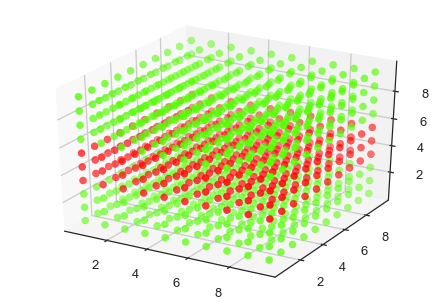

In [144]:
# basic visualization to see connection between coord and values or coord and lithologies
fig = pyplot.figure()

ax = Axes3D(fig)
ax.scatter3D(xs=x,ys=y,zs=z,c=lith_num, s=50, cmap='prism')


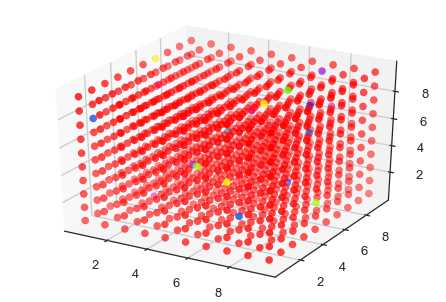

In [145]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter3D(xs=x,ys=y,zs=z,c=c, s=50, cmap='prism')

In [113]:
# creating my own pandas df and see if I can get everything in there
import pandas as pd

In [126]:
# creating dataframe and populating it with our data
d = {'x': x, 'y': y, 'z': z, 'prop': c, 'lith': lith, 'lith_num': lith_num}
df = pd.DataFrame(data=d)


In [135]:
# create reduced dataframe with only one lithology
df_cut = df.loc[df['lith_num'] == 1]

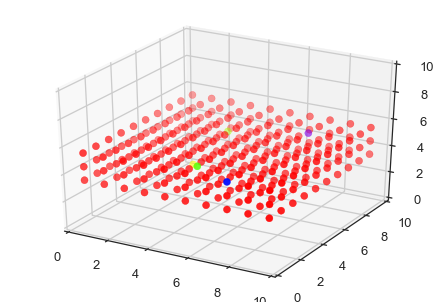

In [146]:
# visualization
fig = pyplot.figure()
ax = Axes3D(fig)
ax.axes.set_zlim3d(0,10)
ax.axes.set_xlim3d(0,10)
ax.axes.set_ylim3d(0,10)
ax.scatter3D(xs=df_cut.x,ys=df_cut.y,zs=df_cut.z, c=df_cut.prop, s=50, cmap='prism')